In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [3]:
# Read a CSV file into a DataFrame using pandas
df = pd.read_csv(r"C:\Users\Mandela Tangban\Documents\Zummit AI-ML Learning Path\California_House_Price.csv")

In [4]:
# Display the first five rows of the DataFrame 'df'.
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [5]:
# Display a summary of the DataFrame 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
# Display the dimensions of the DataFrame 'df' as a tuple
df.shape

(20640, 10)

In [7]:
# Calculate the number of missing (null) values in each column of the DataFrame 'df'
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [8]:
# Calculate the percentage of missing (null) values in each column of the DataFrame 'df'
df.isnull().mean()*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
median_house_value    0.000000
dtype: float64

In [9]:
# Replace NaN values with the mean of the 'total_bedrooms' column
df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)

C:\Users\Mandela Tangban\AppData\Local\Temp\ipykernel_13048\2869129190.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].mean(), inplace=True)


In [10]:
# Calculate the number of missing (null) values in each column of the DataFrame 'df'
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [11]:
# Check for duplicates in the entire DataFrame and drop them in place
df.drop_duplicates(inplace=True)

# Count the number of duplicate rows
num_duplicate_rows = df.duplicated().sum()

# Display the number of duplicate rows
print("Number of duplicate rows:", num_duplicate_rows)

# Display the duplicate rows themselves
duplicate_rows_df = df[df.duplicated()]
print("Duplicate rows:")
print(duplicate_rows_df)

Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity, median_house_value]
Index: []


In [12]:
# Generate descriptive statistics of the DataFrame 'df'
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix of the numeric DataFrame
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069260 -0.066658           -0.318998     0.927253   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069260    0.099773    0.055310      -0.015176   
latitude                 -0.066658   -0.108785   -0.071035      -

<Figure size 1000x1000 with 0 Axes>

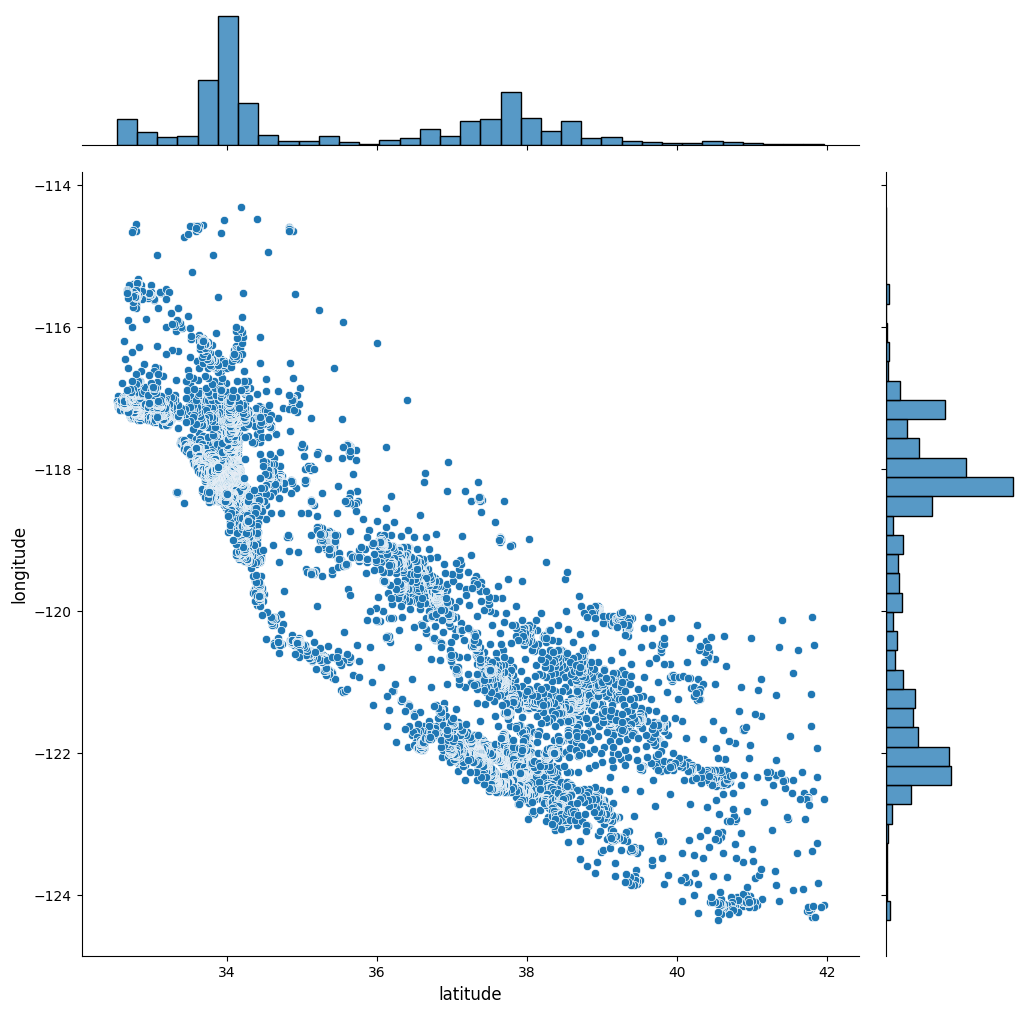

<Figure size 640x480 with 0 Axes>

In [14]:
# Create a new figure with a specified size (10 inches by 10 inches)
plt.figure(figsize=(10, 10))

# Create a joint plot (scatter plot with histograms) using seaborn
sns.jointplot(x=df.latitude.values, y=df.longitude.values, height=10)

# Set the label for the y-axis (longitude) with a font size of 12
plt.ylabel('longitude', fontsize=12)

# Set the label for the x-axis (latitude) with a font size of 12
plt.xlabel('latitude', fontsize=12)

# Display the plot
plt.show()

# Remove the top and right spines from the plot for a cleaner look
sns.despine()

C:\Users\Mandela Tangban\AppData\Local\Temp\ipykernel_13048\3823389060.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ocean_proximity', y='median_house_value', data=avg_median_house_value_per_proximity, palette='viridis')


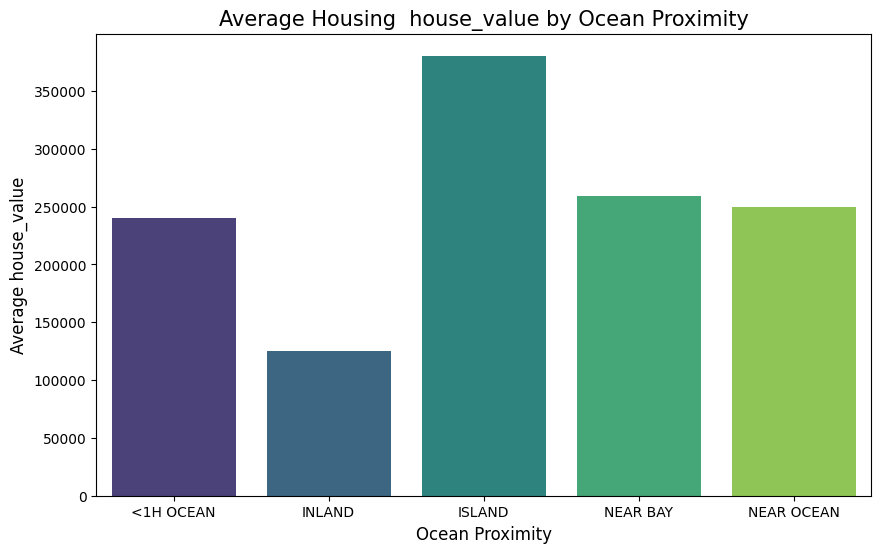

In [15]:
# Calculate the average median_house_value for each ocean proximity category
avg_median_house_value_per_proximity = df.groupby('ocean_proximity')['median_house_value'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='ocean_proximity', y='median_house_value', data=avg_median_house_value_per_proximity, palette='viridis')

# Add labels and title
plt.xlabel('Ocean Proximity', fontsize=12)
plt.ylabel('Average house_value', fontsize=12)
plt.title('Average Housing  house_value by Ocean Proximity', fontsize=15)

# Show plot
plt.show()

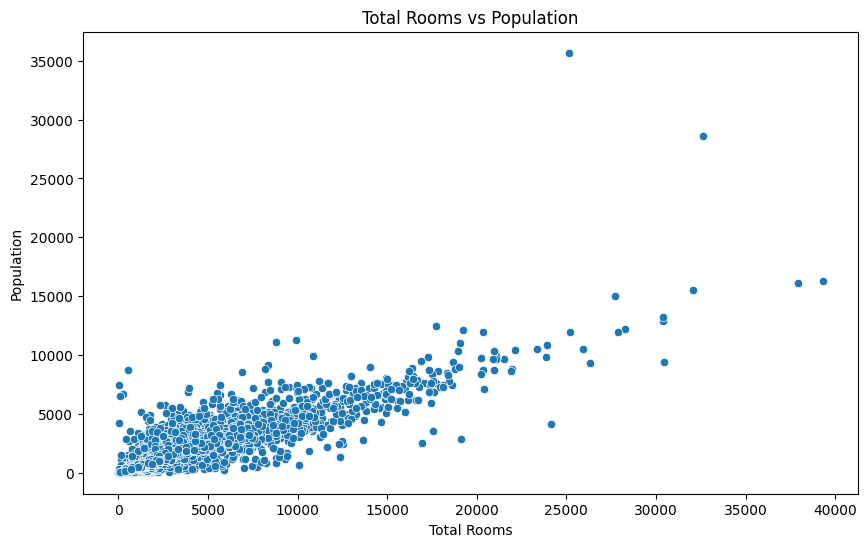

In [16]:
# Create a new figure with a specified size (10 inches wide by 6 inches tall)
plt.figure(figsize=(10, 6))

# Create a scatter plot using seaborn
sns.scatterplot(x='total_rooms', y='population', data=df)

# Set the label for the x-axis
plt.xlabel('Total Rooms')

# Set the label for the y-axis
plt.ylabel('Population')

# Set the title for the plot
plt.title('Total Rooms vs Population')

# Display the plot
plt.show()

In [28]:
# Import the OneHotEncoder class from the preprocessing module of scikit-learn
from sklearn.preprocessing import OneHotEncoder

# Import the LinearRegression class from the linear_model module of scikit-learn
from sklearn.linear_model import LinearRegression

# Import the train_test_split class from the model_selection module of scikit-learn
from sklearn.model_selection import train_test_split

# Import the Pipeline class from the pipeline module of scikit-learn
from sklearn.pipeline import Pipeline

# Import the StandardScaler, PolynomialFeatures class from the preprocessing module of scikit-learn
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Import the mean_squared_error class from the metrics module of scikit-learn
from sklearn.metrics import mean_squared_error

# Import the Ridge class from the linear_model module of scikit-learn
from sklearn.linear_model import Ridge

# Import the SVC class from the svm module of scikit-learn
from sklearn.svm import SVC

# Import the svm class from scikit-learn
from sklearn import svm

# Import the ColumnTransformer class from the compose module of scikit-learn
from sklearn.compose import ColumnTransformer

In [18]:
# Instantiate the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the ocean_proximity column
encoded_features = encoder.fit_transform(df[['ocean_proximity']])

# Convert the encoded features to a DataFrame
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(['ocean_proximity']))

# Drop the original ocean_proximity column from the DataFrame
df = df.drop('ocean_proximity', axis=1)

# Concatenate the encoded features with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Now, the DataFrame `df` is ready for linear regression
# Split data into features and target variable
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [19]:
# Split the dataset into training and testing sets
x_train , x_test , y_train , y_test = train_test_split(X, y , test_size = 0.10,random_state =2)

In [20]:
# Create a pipeline with preprocessing and model
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Normalize data
    ('poly', PolynomialFeatures(degree=2)), # Add polynomial features
    ('model', LinearRegression()) # Linear Regression model
])

In [21]:
# Fit the model
pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('model', LinearRegression())])

In [22]:
# Evaluate the model
train_score = pipeline.score(x_train, y_train)
test_score = pipeline.score(x_test, y_test)

print(f"Training Score: {train_score}")
print(f"Test Score: {test_score}")

Training Score: 0.7116912089871654
Test Score: 0.7085071962218076


In [23]:
# import necessary library
import pickle

In [24]:
# Save the trained pipeline to a file using pickle
filename = 'trained_model.sav'
pickle.dump(pipeline, open(filename, 'wb'))

In [25]:
# Open the saved file 'trained_model.sav' in binary read mode ('rb')
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [30]:
# Define the input data
input_data = (-122.23, 37.88, 41, 880, 129, 322, 126, 8.3252)

# Convert the input data to a numpy array
input_data_as_numpy_array = np.array(input_data)

# Reshape the data as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make a prediction using the loaded model
prediction = loaded_model.predict(input_data_reshaped)

# Print the prediction
print(prediction)

c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 8 features, but StandardScaler is expecting 13 features as input.